Project Title: Laptop Price Prediction for SmartTech Co.

In [1]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/laptop.csv')

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [5]:
#dropping the irrelevant columns
df=df.drop(['Unnamed: 0.1','Unnamed: 0'],axis = 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [7]:
#there are 30 missing values
df.isnull().sum()

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [8]:
#drop the duplicates rows and 58 duplicates
print(df.duplicated().sum())
print(df.shape)

58
(1303, 11)


In [9]:
df=df.drop_duplicates()
df.shape

(1245, 11)

In [10]:
#checking the null values in it after droping duplicates and only 1 missing value is present in each column, dropped 1 row
df.isnull().sum()

,0
Company,1
TypeName,1
Inches,1
ScreenResolution,1
Cpu,1
Ram,1
Memory,1
Gpu,1
OpSys,1
Weight,1


In [11]:
#only 1 missing value is present in each column, dropped 1 row
df=df.dropna()
df.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [12]:
#to check which columns have junk values
junk_values=['?',float('nan'),'']
col = []
for column in df:
  if df[column].isin(junk_values).any():
    col.append(column)

print(col)

['Inches', 'Memory', 'Weight']


In [13]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '?', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [14]:
print(df['Inches'].unique())

['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']


In [15]:
print(df['Weight'].unique())

['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg' '1.35kg'
 '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg' '2kg'
 '2.65kg' '2.77kg' '3.2kg' '1.49kg' '2.4kg' '2.13kg' '2.43kg' '1.7kg'
 '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg' '1.63kg'
 '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg' '1.58kg'
 '1.85kg' '1.23kg' '2.16kg' '2.36kg' '7.2kg' '2.05kg' '1.32kg' '1.75kg'
 '0.97kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg' '2.03kg' '1.05kg'
 '5.4kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg' '1.12kg'
 '3.49kg' '3.35kg' '2.23kg' '?' '2.9kg' '4.42kg' '2.69kg' '2.37kg' '4.7kg'
 '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg' '2.24kg'
 '2.67kg' '4.1kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '5.8kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '8.23kg' '1.26kg'
 '1.84kg' '0.0002kg' '2.6kg' '2.26kg' '3.25kg' '1.59kg' '1.13kg' '1.42kg'
 '1.7

In [16]:
#dropping the rows which has "?"
rows_to_drop=df.apply(lambda x:'?' in x.values,axis=1)
df=df[~rows_to_drop] # this will remove the "?"

In [17]:
#check again if columns have junk values
junk_values=['?',float('nan'),'']
col = []
for column in df:
  if df[column].isin(junk_values).any():
    col.append(column)

print(col)

[]


In [18]:
df.dtypes

,0
Company,object
TypeName,object
Inches,object
ScreenResolution,object
Cpu,object
Ram,object
Memory,object
Gpu,object
OpSys,object
Weight,object


In [19]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [20]:
# removing units like kg, gb.
df['Weight']=df['Weight'].str.replace('kg','').astype(float)
df['Ram']=df['Ram'].str.replace('GB','').astype(int)
df['Inches']=df['Inches'].astype(float)

In [21]:
df.dtypes

,0
Company,object
TypeName,object
Inches,float64
ScreenResolution,object
Cpu,object
Ram,int64
Memory,object
Gpu,object
OpSys,object
Weight,float64


In [22]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


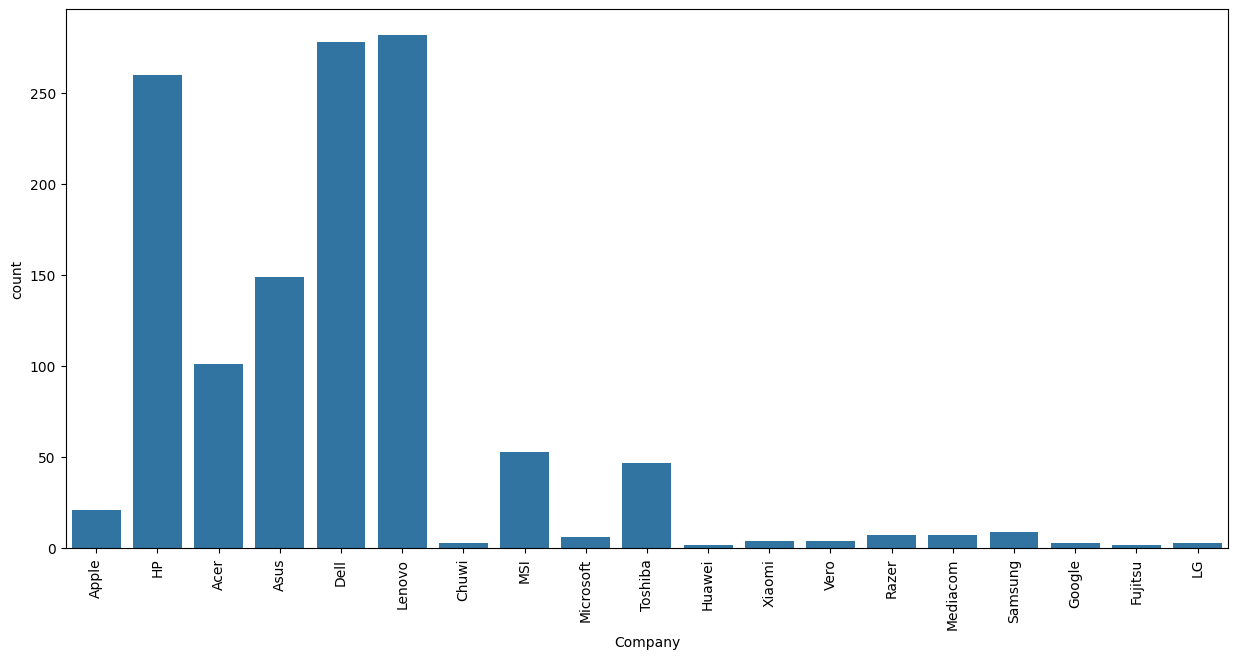

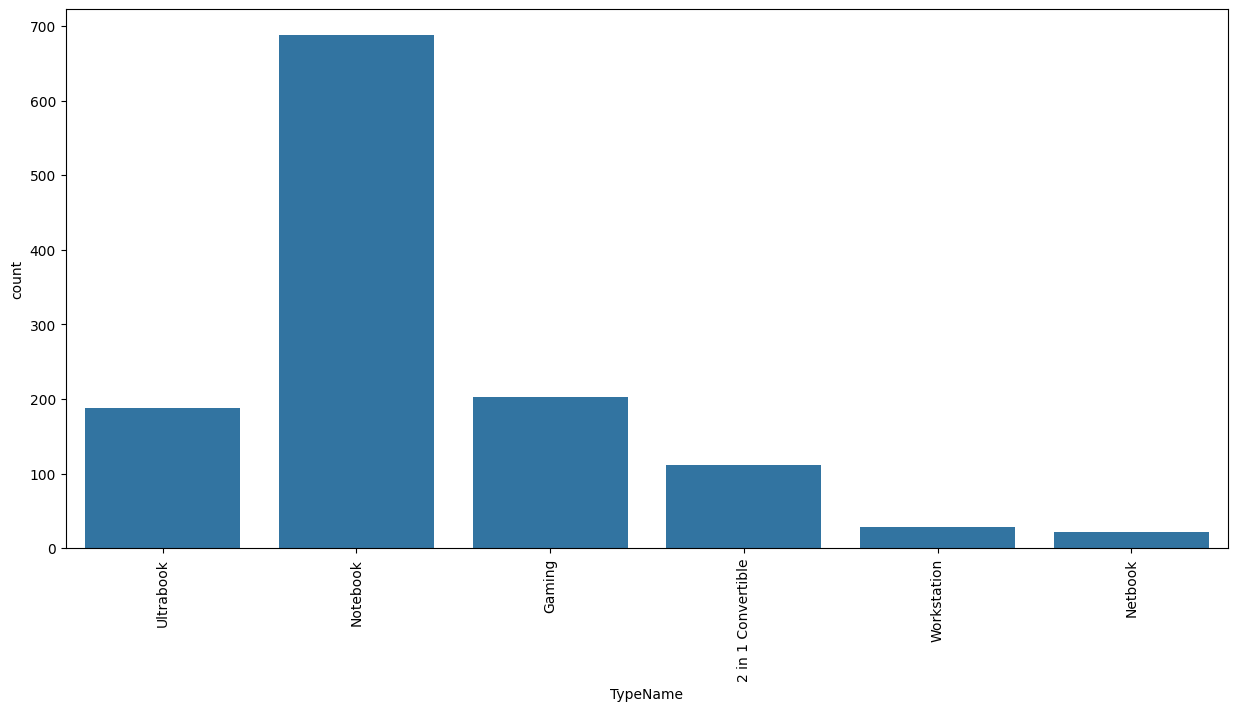

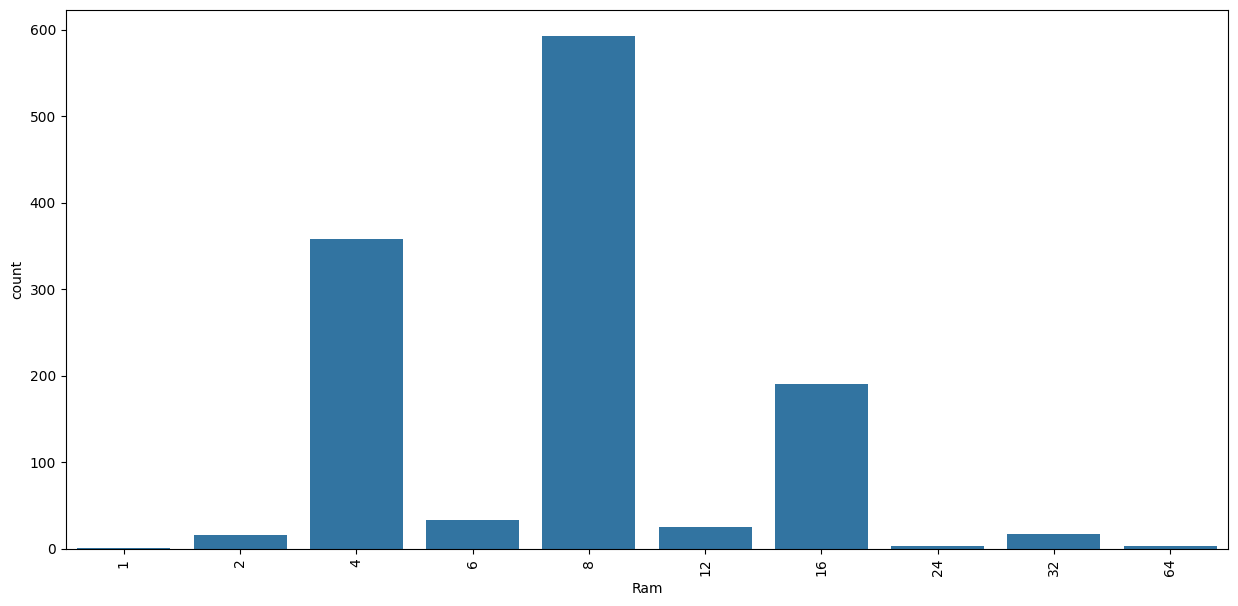

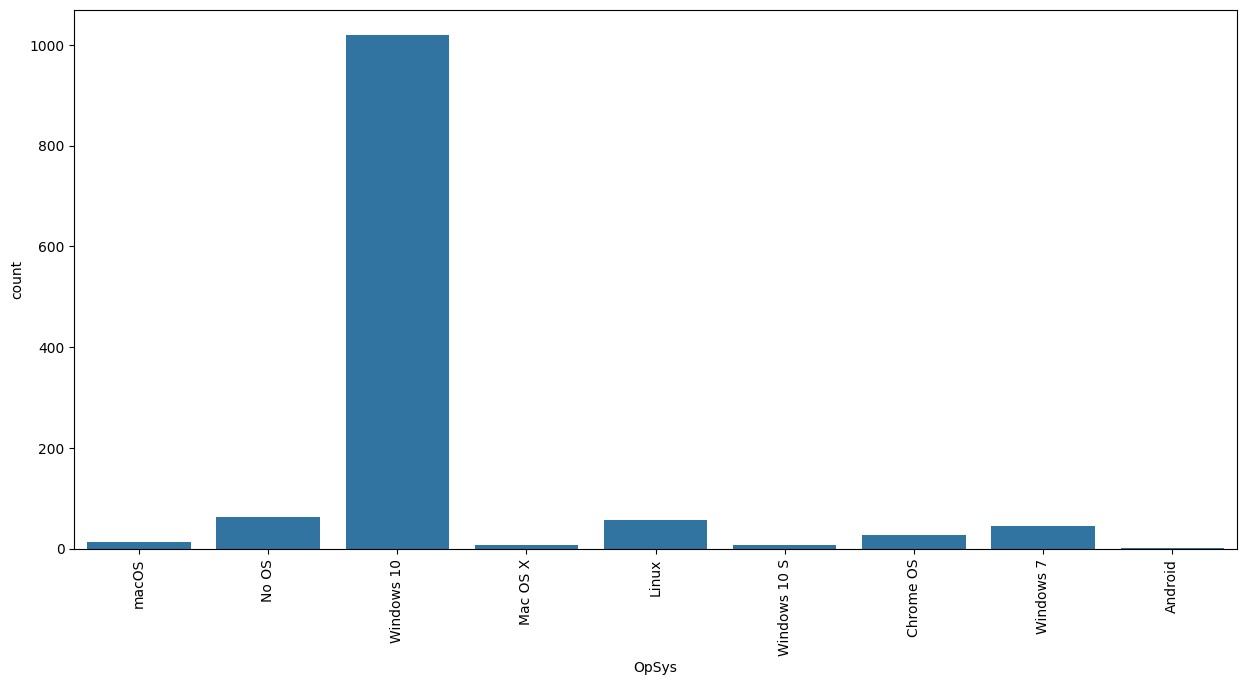

In [23]:
#plotting countplots for the categorical variables
def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(x=df[col])
    plt.xticks(rotation='vertical')
    plt.show()

to_view = ['Company','TypeName','Ram','OpSys']
for col in to_view:
    drawplot(col)

'''Insights Lenovo. HP. Dell have the highest number of laptops in the market with over 250 Type of laptop is Notebook which is maximum Laptop with 8 GB RAM is being sold the most Windows 10 has the most market share

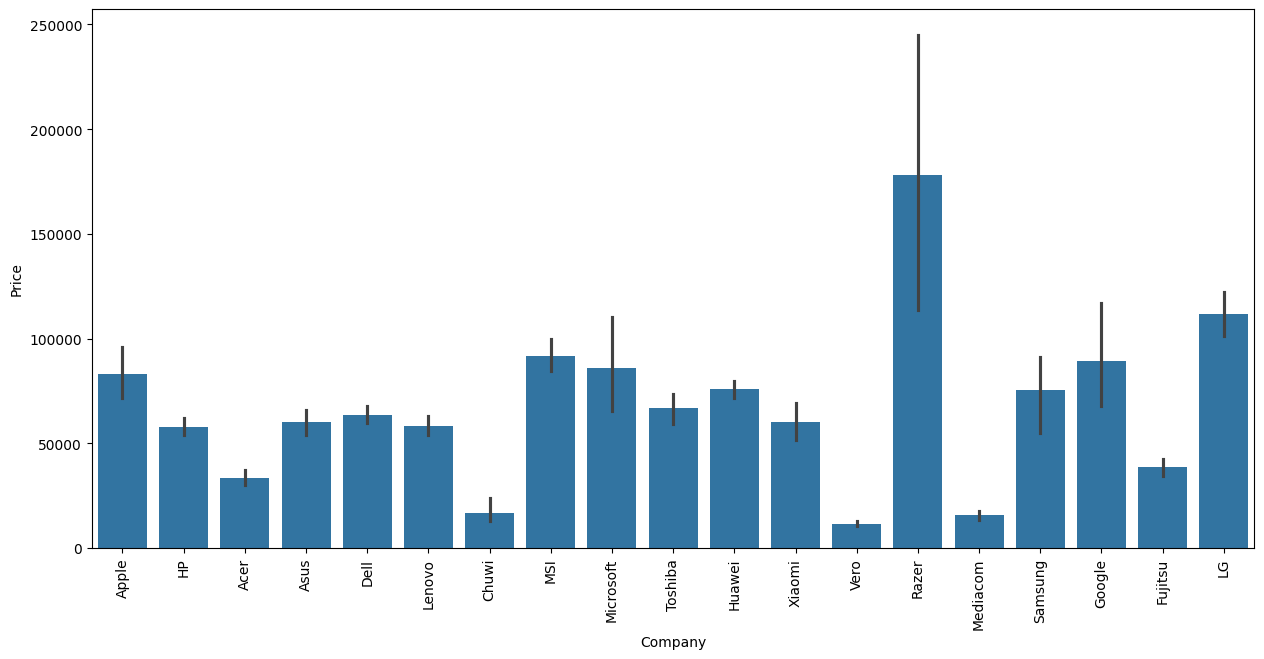

In [24]:
# average price for each of the laptop brands
#this will say as the insight that as per company the price of the laptop Very


plt.figure(figsize=(15,7))
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Price of razer laptop is highest, gaming laptop price is always on the higher side

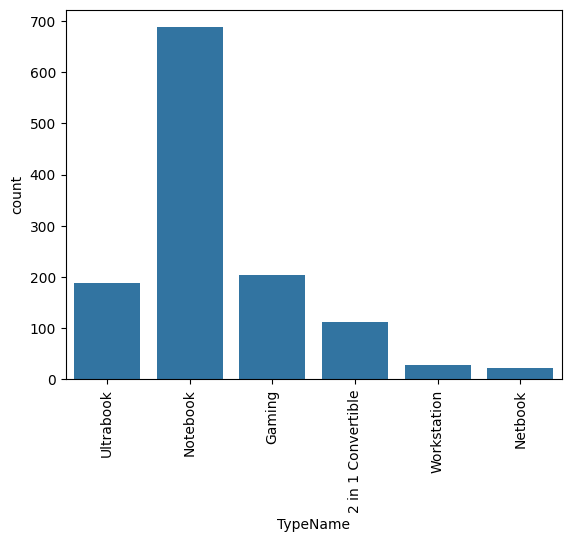

In [25]:
# various types of laptop
sns.countplot(x=df['TypeName'])
plt.xticks(rotation='vertical')
plt.show()

Notebook laptops are most in the market

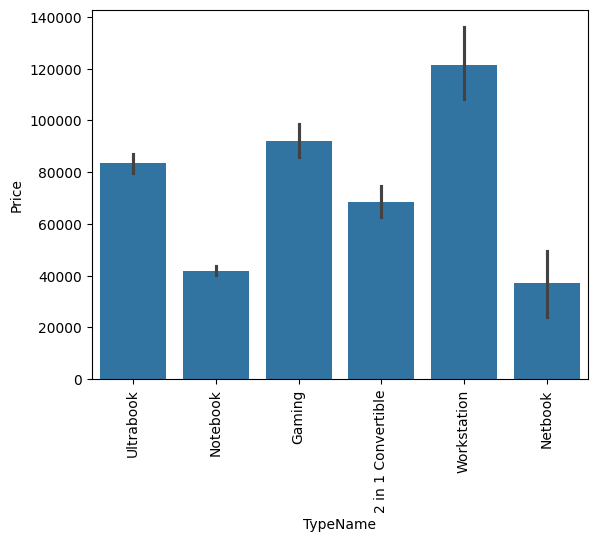

In [26]:
#laptop types and variation about the price
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

workstation has the highest price of around 120000, gaming laptop ranks 2nd in the price range of 80k to 100k

<Axes: xlabel='Inches', ylabel='Price'>

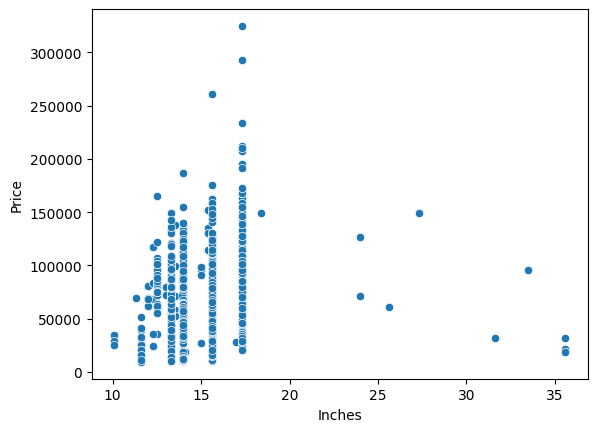

In [27]:
#variation of inches towords the price
sns.scatterplot(x=df['Inches'],y=df['Price'])

from the above plot we can say the most of the laptops are within 20 inches, and price of around 17inches have outliers

In [28]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,490
1366x768,255
IPS Panel Full HD 1920x1080,222
IPS Panel Full HD / Touchscreen 1920x1080,50
Full HD / Touchscreen 1920x1080,45
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,14
IPS Panel 4K Ultra HD 3840x2160,12


In [29]:
#creating a new col, laptop is touchscreen if the value is 1
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1
                                               if 'Touchscreen' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<Axes: xlabel='TouchScreen', ylabel='count'>

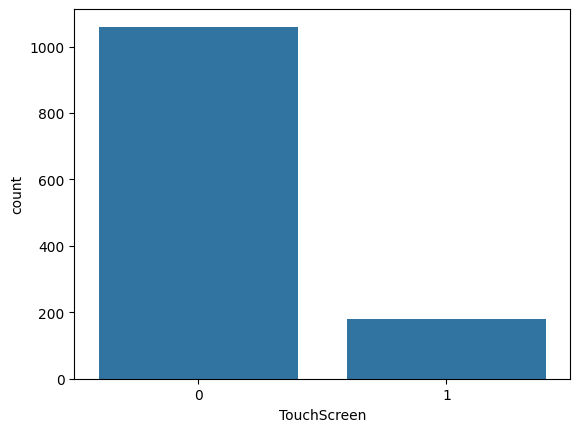

In [30]:
sns.countplot(x=df['TouchScreen'])

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

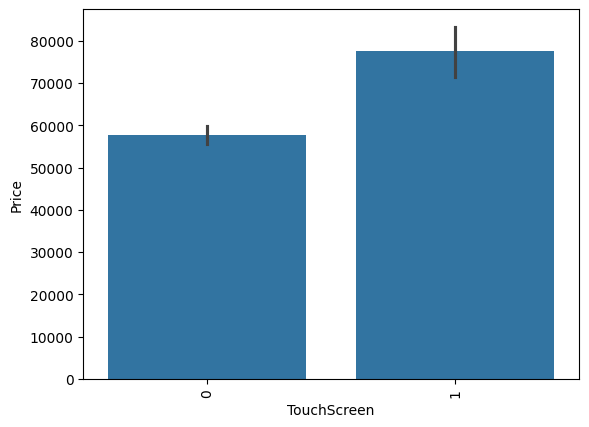

In [31]:
# comparison btn touchscreen and price of laptop
sns.barplot(x=df['TouchScreen'],y=df['Price'])
plt.xticks(rotation='vertical')

In [32]:
#creating  a new col named IPS, does the laptop have IPS facility or not
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if "IPS" in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
358,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Intel HD Graphics 620,Windows 10,2.36,29696.6736,1,0
1138,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818.7200,0,0
976,Lenovo,Notebook,14.0,1366x768,Intel Core i5 6200U 2.3GHz,4,508GB Hybrid,Intel HD Graphics 520,Windows 7,1.70,53386.5600,0,0
1027,HP,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.95,56476.8000,0,0
100,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon 530,Windows 10,1.91,38308.3200,0,0


<ipython-input-35-dbec92e6cc67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['IPS'],palette='plasma')


<Axes: xlabel='IPS', ylabel='count'>

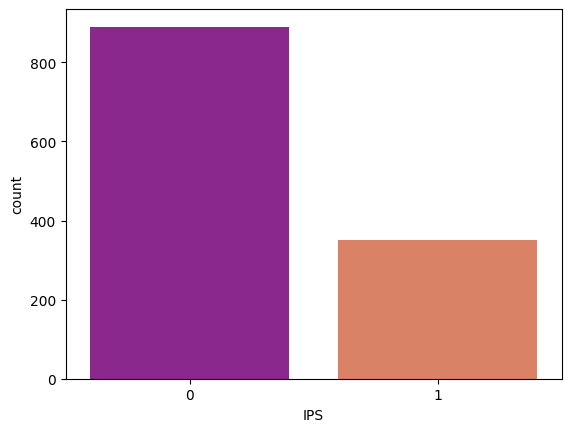

In [35]:
sns.countplot(x=df['IPS'],palette='plasma')

([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

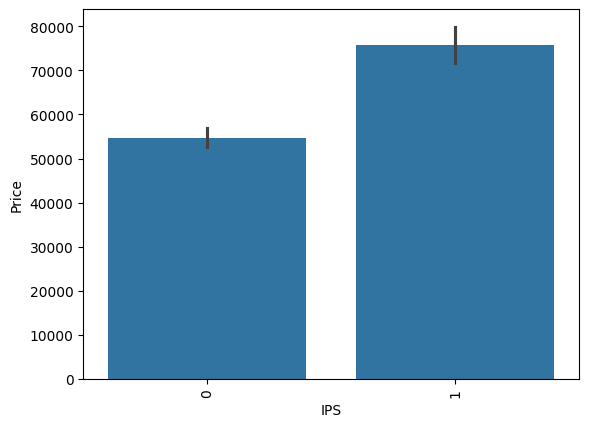

In [36]:
sns.barplot(x=df['IPS'],y=df['Price'])
plt.xticks(rotation='vertical')

# Extracting the X resolution and y resolution

In [37]:
#we will split the text at the "x" letter and separate the 2 parts
#from this we  can observe that one of the col is y res,  we need to do
#feature engineering on the  X res col


df['Screen']=df['ScreenResolution'].str.split().str[-1].str.split('x')
df['x_res']=df['Screen'].str[0].astype(int)
df['y_res']=df['Screen'].str[1].astype(int)

In [38]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,Screen,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,"[2560, 1600]",2560,1600


In [39]:
df.drop(['Screen'],axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1241 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1241 non-null   object 
 1   TypeName          1241 non-null   object 
 2   Inches            1241 non-null   float64
 3   ScreenResolution  1241 non-null   object 
 4   Cpu               1241 non-null   object 
 5   Ram               1241 non-null   int64  
 6   Memory            1241 non-null   object 
 7   Gpu               1241 non-null   object 
 8   OpSys             1241 non-null   object 
 9   Weight            1241 non-null   float64
 10  Price             1241 non-null   float64
 11  TouchScreen       1241 non-null   int64  
 12  IPS               1241 non-null   int64  
 13  x_res             1241 non-null   int64  
 14  y_res             1241 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 155.1+ KB


In [41]:
# to check the correlation , we need to compare price with only numerical columns,
#so extracting the numerical columns to a dataframe
nv=df[df.select_dtypes(include=['int32','int64','float32','float64']).columns]
nv

,Inches,Ram,Weight,Price,TouchScreen,IPS,x_res,y_res
0,13.3,8,1.37,71378.6832,0,1,2560,1600
1,13.3,8,1.34,47895.5232,0,0,1440,900
2,15.6,8,1.86,30636.0000,0,0,1920,1080
3,15.4,16,1.83,135195.3360,0,1,2880,1800
4,13.3,8,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...
1269,15.6,4,2.20,38378.6496,0,0,1366,768
1270,14.0,4,1.80,33992.6400,1,1,1920,1080
1271,13.3,16,1.30,79866.7200,1,1,3200,1800
1272,14.0,2,1.50,12201.1200,0,0,1366,768


In [42]:
nv.corr()['Price']

,Price
Inches,0.042826
Ram,0.683478
Weight,0.177134
Price,1.000000
TouchScreen,0.187464
IPS,0.254603
x_res,0.553740
y_res,0.550038


From the correlation plot we observed that as the X_res and Y_res is increasing the price of the laptop is also increasing,so X_res and Y_res are positively correlated and they are giving much information, so that is the reason why i had splitted Resolution column into X_res and Y_res columns respectively

So to make things good, we can create a new column named PPI(pixels per inch), now as we saw from the correlation plot that the Xres and Y_res are having much collinearity, so why not combine them with inches which is having less collinearity,so we will combine them as follows,so here is the formula of how to calculate PPI (pixels per inch)

In [43]:
df['PPI']=(((df['x_res']**2+df['y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,x_res,y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [44]:
nv=df[df.select_dtypes(include=['int32','int64','float32','float64']).columns]
nv.corr()["Price"]

,Price
Inches,0.042826
Ram,0.683478
Weight,0.177134
Price,1.000000
TouchScreen,0.187464
IPS,0.254603
x_res,0.553740
y_res,0.550038
PPI,0.465409


So we observe from the correlation data that the PPI is having good correlation, and that gives collective results of 3 columns, so we so we will be using that, as that is a combination of 3 features will drop Inches, X_res, Y_res as well

In [45]:
df.drop(columns=['ScreenResolution','Inches','x_res','y_res'],inplace=True)
df.head(1)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005


In [46]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,183
Intel Core i7 7700HQ 2.8GHz,141
Intel Core i7 7500U 2.7GHz,125
Intel Core i7 8550U 1.8GHz,71
Intel Core i5 8250U 1.6GHz,68
...,...
AMD A9-Series 9420 2.9GHz,1
Intel Core i5 6440HQ 2.6GHz,1
AMD A6-Series 7310 2GHz,1


In [47]:
#so if we observe we need to extract the first 3 words of the cpu column,
#as the first 3 words of every row under the cpu col is the of the CPU, so we will be using them.

df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[:3]))
df['Cpu_name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'AMD E-Series E2-9000e',
       'Intel Atom x5-Z8300', 'AMD E-Series E2-6110',
       'AMD A6-Series 9220', 'Intel Celeron Dual', 'AMD Ryzen 1700',
       'Intel Pentium Quad', 'AMD FX 9830P', 'AMD E-Series 6110',
       'Intel Xeon E3-1505M', 'AMD E-Series 9000e',
       'AMD A10-Series A10-9620P', 'AMD A6-Series A6-9220',
       'AMD A10-Series 9600P', 'AMD A8-Series 7410',
       'AMD A12-Series 9720P', 'Intel Celeron Quad', 'AMD Ryzen 1600',
       'Intel Atom x5-Z8350', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Intel Atom x5-Z8550',
       'Samsung Cortex A72&A53', 'AMD E-Series 9000',
       'AMD A9-Series 9410'], dtype=object)

In [48]:
def processortype(text):

    if text == 'Intel Core i7' or text=='Intel Core i5' or text =='Intel Core i3':
       return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
          return 'AMD Processor'

df['Cpu_name']=df['Cpu_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [49]:
df.drop(['Cpu'],axis=1,inplace=True)

<ipython-input-50-c418daeac209>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cpu_name'],palette='viridis')


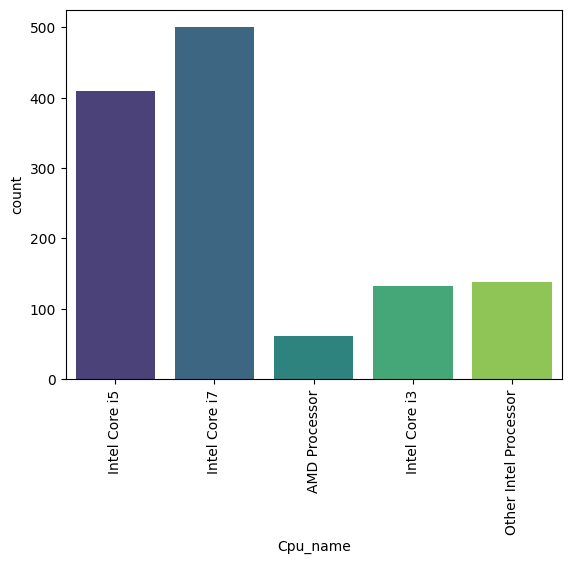

In [50]:
sns.countplot(x=df['Cpu_name'],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-51-44a59ca79f07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Cpu_name'],y=df['Price'],palette='viridis')


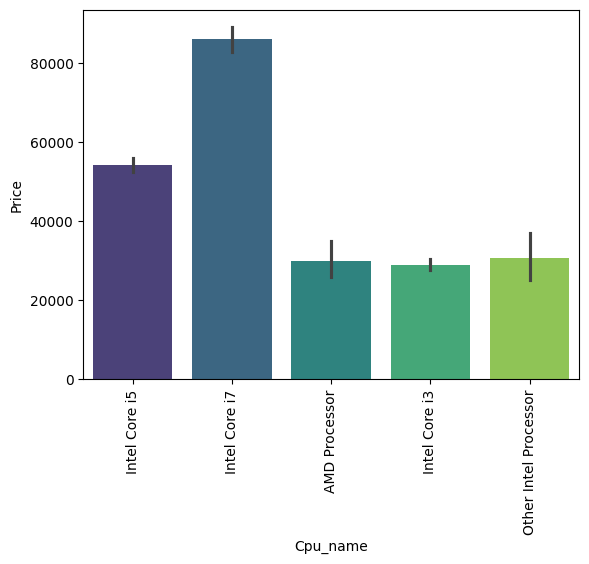

In [51]:
sns.barplot(x=df['Cpu_name'],y=df['Price'],palette='viridis')
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df.head(1)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5


# RAM Analysis

<Axes: xlabel='Ram', ylabel='count'>

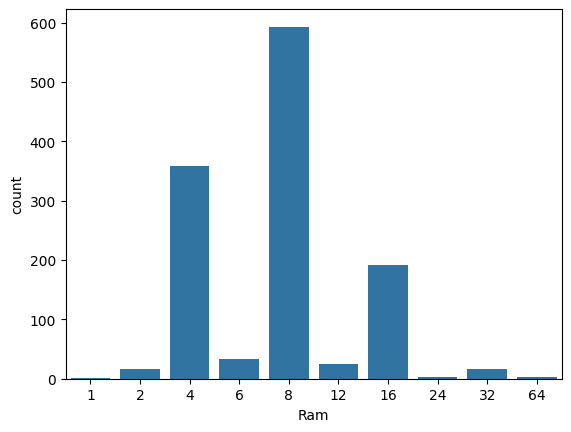

In [53]:
sns.countplot(x=df['Ram'])

<Axes: xlabel='Ram', ylabel='Price'>

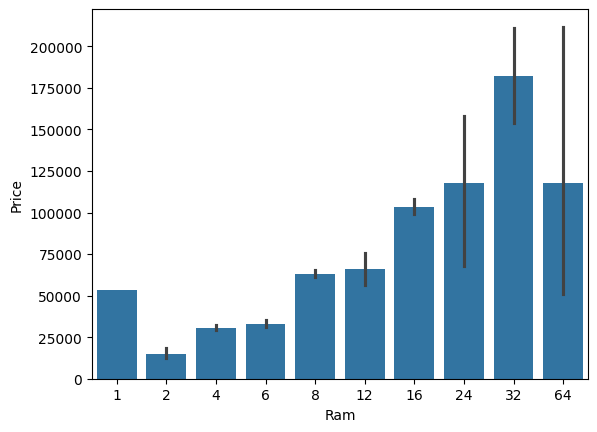

In [54]:
sns.barplot(x=df['Ram'],y=df['Price'])

Price increases as the Ram increase . so Ram has a +ve coorelation with price

# Extract memory type from memory column

In [55]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,399
1TB HDD,209
500GB HDD,121
512GB SSD,112
128GB SSD + 1TB HDD,92
128GB SSD,72
256GB SSD + 1TB HDD,71
32GB Flash Storage,35
2TB HDD,16


In [56]:
#we will seperate the Type of memory and the value of it. There are different
#dimensions in the data, 128GB SSD + 1TB HDD, #so inorder to ofr it come in a
#same dimension we need to do some modifications which are done below as shown

#4 most common variants observed HDD, SDD, Flash, Hybrid
#this expression will remove the decimal space for example 1.0 TB will be 1TB



df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
#replace the gb word with ""
df['Memory']=df['Memory'].str.replace('GB','')
#replace the TB word with "000"
df['Memory']=df['Memory'].str.replace('TB','000')
#split the word across the "+" character
new_df=df['Memory'].str.split("+",n=1,expand=True)
new_df

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


In [57]:
#we will strip up all the white spaces , basically eliminating white space
df['first']=new_df[0]
df['first']=df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


# HDD

In [58]:
def applychanges(value):
    df['Layer1'+value]=df['first'].apply(lambda x:1 if value in x else 0)

list_to_apply = ['HDD','SSD', 'Hybrid','FlashStorage']
for value in list_to_apply:
    applychanges(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [59]:
#remove all the characters just keep the numbers
df['first']=df['first'].str.replace(r'\D','',regex=True)
df['first'].value_counts()

,count
first,
256,493
1000,233
128,171
512,134
500,121
32,42
2000,16
64,14
16,10


In [60]:
df['Second']=new_df[1]
df.head()
df['Second'].unique()

array([None, '  1000 HDD', '  256 SSD', '  2000 HDD', '  500 HDD',
       '  512 SSD', '  1000 Hybrid'], dtype=object)

In [61]:
def applychanges1(value):
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)

list_to_apply1=['HDD', 'SSD', 'Hybrid', 'FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in list_to_apply1:
    applychanges1(value)

#remove all the character just keep the numbers
df['Second']=df['Second'].str.replace(r'\D','',regex=True)
df['Second'].value_counts()

,count
Second,
0,1037
1000,183
2000,15
256,3
500,2
512,1


In [62]:
df['first'] =df['first'].astype('int')
df['Second']=df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


In [63]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


In [64]:
#droping pf unnecessary columns
df.drop(columns=['first','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1FlashStorage',
                 'Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2FlashStorage'],inplace=True)

In [65]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Hybrid,Flash_Storage
149,Acer,Notebook,4,Intel HD Graphics 520,Windows 10,2.10,23816.16,0,0,100.454670,Intel Core i3,1000,0,0,0
423,Asus,Notebook,8,Nvidia GeForce 940MX,Linux,2.30,31808.16,0,0,61.879415,Intel Core i3,1000,0,0,0
335,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.48,67559.04,0,0,157.350512,Intel Core i5,0,256,0,0
268,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.50,54239.04,0,0,127.335675,Intel Core i7,1000,0,0,0
110,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.50,67239.36,0,0,141.211998,Intel Core i7,1000,256,0,0


In [66]:
df.head(1)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0


# GPU Analysis

In [67]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,269
Intel HD Graphics 520,177
Intel UHD Graphics 620,65
Nvidia GeForce GTX 1050,64
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [68]:
df.loc[1]['Gpu'].split()[0]

'Intel'

In [69]:
df['Gpu_brand']=df['Gpu'].apply(lambda x: x.split()[0])
df['Gpu_brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

<Axes: xlabel='Gpu_brand', ylabel='count'>

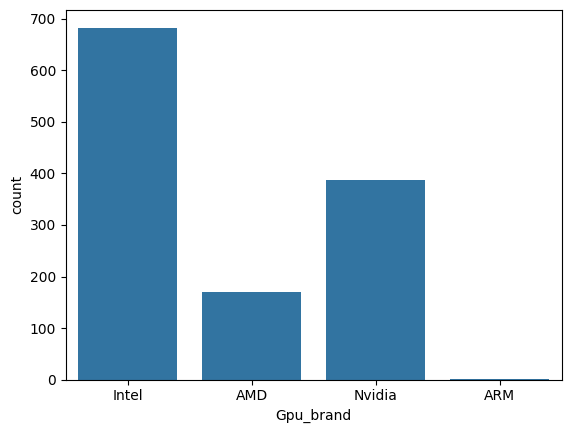

In [70]:
sns.countplot(x=df['Gpu_brand'])

<Axes: xlabel='Gpu_brand', ylabel='count'>

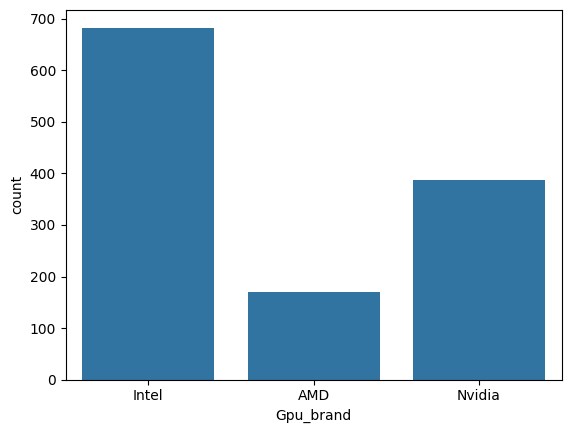

In [71]:
df=df[df['Gpu_brand']!='ARM']
sns.countplot(x=df['Gpu_brand'])

<Axes: xlabel='Gpu_brand', ylabel='Price'>

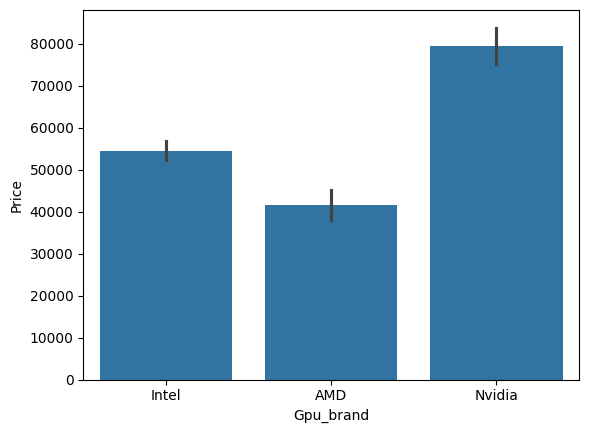

In [72]:
sns.barplot(x=df['Gpu_brand'],y=df['Price'])

Nvidia gpu brand has most price compared to intel and amd

In [73]:
df=df.drop(columns=['Gpu'])
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel


In [74]:
DF_copy=df

# Operating System

In [75]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1019
No OS,63
Linux,57
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [76]:
def setcategory(text):

    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'Mac OS X' or text == 'macOS':
         return 'Mac'
    else:
         return 'Other'
df['OpSys']= df['OpSys'].apply(lambda text:setcategory(text))

<Axes: xlabel='OpSys', ylabel='count'>

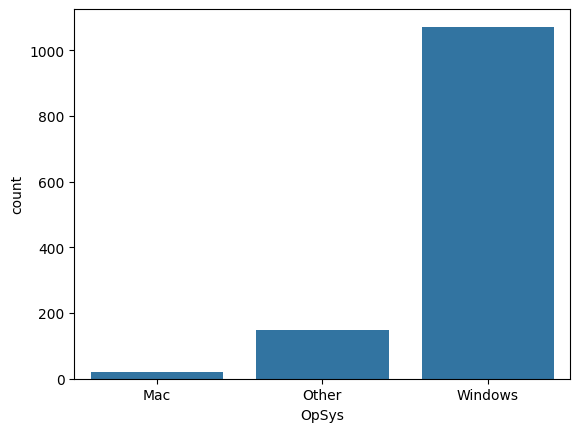

In [77]:
sns.countplot(x=df['OpSys'])

<Axes: xlabel='OpSys', ylabel='Price'>

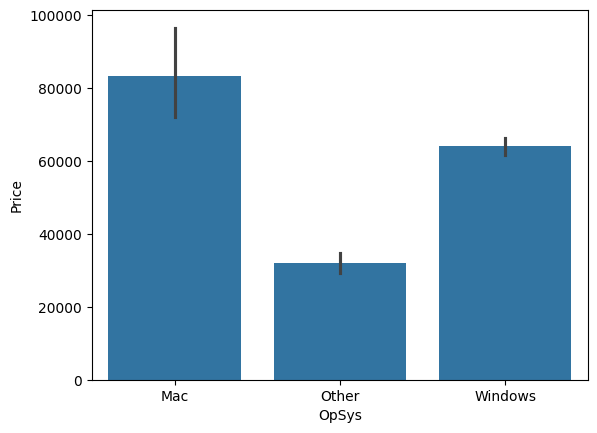

In [78]:
sns.barplot(x=df['OpSys'],y=df['Price'])

# weight analysis

<Axes: xlabel='Weight', ylabel='Count'>

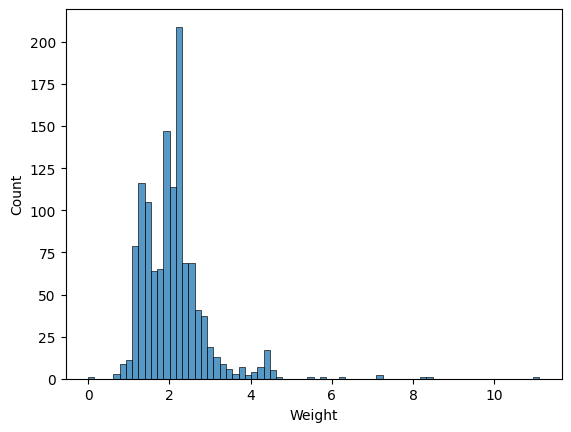

In [79]:
sns.histplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

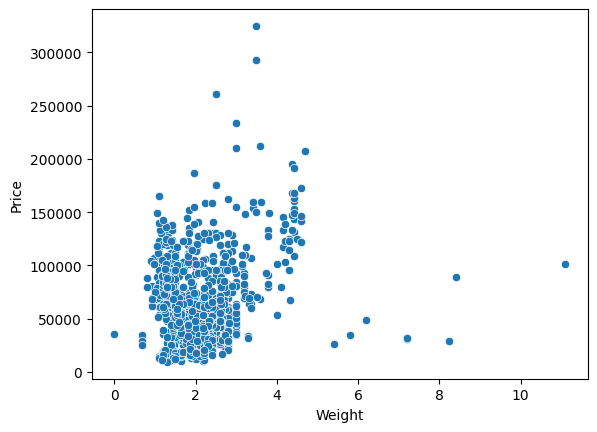

In [80]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

weight increases the price also tends to increase, at least up to a certain point. there does not seem to be a clear linear relationship as the points do not from a distinct line.

# Price Analysis

<Axes: xlabel='Price', ylabel='Count'>

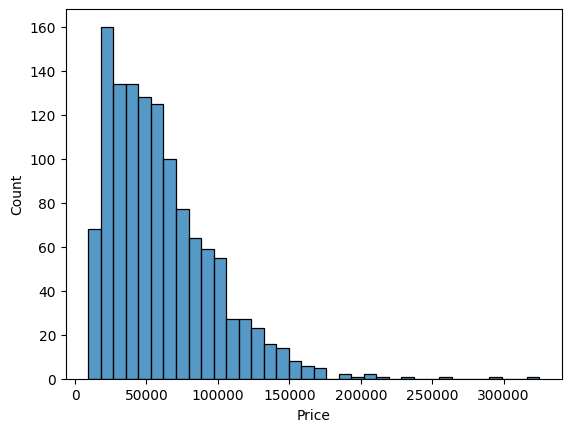

In [81]:
sns.histplot(df['Price'])

In [82]:
df['Price']=np.log(df['Price'])

<Axes: ylabel='Price'>

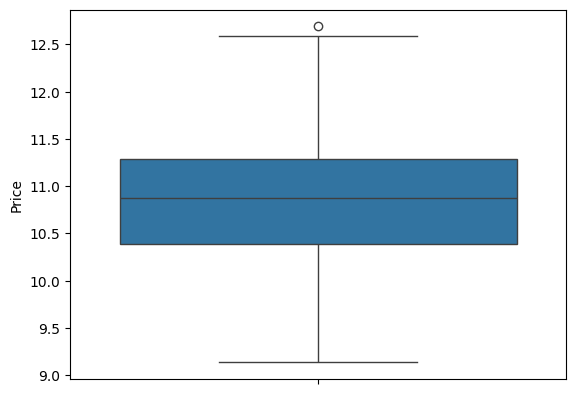

In [83]:
sns.boxplot(df,y='Price')

In [84]:
df.dtypes

,0
Company,object
TypeName,object
Ram,int64
OpSys,object
Weight,float64
Price,float64
TouchScreen,int64
IPS,int64
PPI,float64
Cpu_name,object


In [85]:
nv=df[df.select_dtypes(include=['int32','int64','float32','float64']).columns]
nv

,Ram,Weight,Price,TouchScreen,IPS,PPI,HDD,SSD,Hybrid,Flash_Storage
0,8,1.37,11.175755,0,1,226.983005,0,128,0,0
1,8,1.34,10.776777,0,0,127.677940,0,0,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256,0,0
3,16,1.83,11.814476,0,1,220.534624,0,512,0,0
4,8,1.37,11.473101,0,1,226.983005,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...
1269,4,2.20,10.555257,0,0,100.454670,500,0,0,0
1270,4,1.80,10.433899,1,1,157.350512,0,128,0,0
1271,16,1.30,11.288115,1,1,276.053530,0,512,0,0
1272,2,1.50,9.409283,0,0,111.935204,0,0,0,0


In [86]:
nv.corr()['Price']

,Price
Ram,0.630940
Weight,0.127102
Price,1.000000
TouchScreen,0.194344
IPS,0.284533
PPI,0.479272
HDD,-0.096742
SSD,0.658670
Hybrid,0.022766
Flash_Storage,NaN


<Axes: >

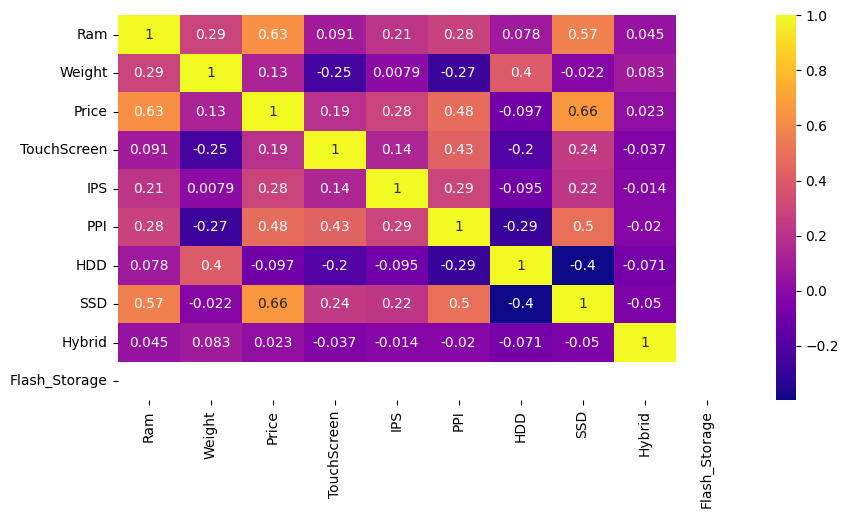

In [87]:
plt.figure(figsize=(10,5))
sns.heatmap(nv.corr(),annot=True,cmap='plasma')

Strong positive correlation with Price (0.63): Higher RAM likely leads to higher prices.

Strong positive correlation with SSD (0.65): Higher-priced devices often come with SSDs

Moderate positive correlations with PPI (0.47) and IPS (0.28): Higher-priced devices may have better screens.

In [88]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Hybrid,Flash_Storage,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,0,0,Intel
1,Apple,Ultrabook,8,Mac,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,0,0,Intel
2,HP,Notebook,8,Other,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,0,0,Intel
3,Apple,Ultrabook,16,Mac,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,0,0,AMD
4,Apple,Ultrabook,8,Mac,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,0,0,Intel


In [89]:
df.drop(columns=['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [90]:
df.head(1)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel


# Now we divide the train and test data

In [91]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

In [93]:
X.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((992, 12), (248, 12))

In [95]:
X_test

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,Cpu_name,HDD,SSD,Gpu_brand
427,Dell,Ultrabook,8,Other,1.600,0,0,157.350512,Intel Core i7,0,256,Intel
269,Lenovo,Notebook,8,Windows,2.050,0,0,141.211998,Intel Core i7,0,256,Intel
343,Lenovo,2 in 1 Convertible,16,Windows,1.400,1,1,316.965060,Intel Core i7,0,512,Intel
640,Lenovo,Gaming,8,Windows,2.500,0,1,141.211998,Intel Core i7,1000,128,Nvidia
104,Microsoft,Ultrabook,8,Windows,1.252,1,0,200.842560,Intel Core i5,0,256,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...
668,Toshiba,Notebook,8,Windows,2.000,0,1,141.211998,Intel Core i5,0,256,Intel
1006,HP,Notebook,4,Windows,1.950,0,0,157.350512,Intel Core i5,0,256,Intel
184,Xiaomi,Notebook,8,Other,1.950,0,1,141.211998,Intel Core i5,0,256,Nvidia
32,HP,Notebook,4,Windows,2.710,0,0,127.335675,AMD Processor,500,0,AMD


In [96]:
mapper={i:value for i, value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'Cpu_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu_brand'}

# Linear Regression

In [97]:
step1=ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore'),[0,1,3,8,11])
], remainder="passthrough")

step2=LinearRegression()

pipe=Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred=pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8010201933532056
MAE 0.19446441494970784


# Random Forest

In [98]:
step1=ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore'),[0,1,3,8,11])
], remainder='passthrough')

step2=RandomForestRegressor(n_estimators=100,
                            random_state=3,
                            max_samples=0.5,
                            max_features=0.75,
                            max_depth=15)

pipee = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipee.fit(X_train,y_train)

y_pred=pipee.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.8562139388202987
MAE 0.163436753120873


# Gradient Boosting

In [99]:
step1=ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop=None, handle_unknown='ignore'),[0,1,3,8,11])
], remainder='passthrough')

step2=GradientBoostingRegressor(n_estimators=500)

pipe2 = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred=pipe2.predict(X_test)

print('R2 score', r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8707713428108648
MAE 0.15179924781547824


In [100]:
X_train.values

array([['Dell', 'Ultrabook', 8, ..., 0, 256, 'Intel'],
       ['Asus', 'Notebook', 4, ..., 0, 0, 'Intel'],
       ['HP', 'Ultrabook', 8, ..., 0, 256, 'Intel'],
       ...,
       ['MSI', 'Gaming', 16, ..., 1000, 256, 'Nvidia'],
       ['HP', '2 in 1 Convertible', 4, ..., 0, 256, 'Intel'],
       ['Lenovo', 'Ultrabook', 12, ..., 0, 512, 'Intel']], dtype=object)

In [101]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'Price', 'TouchScreen',
       'IPS', 'PPI', 'Cpu_name', 'HDD', 'SSD', 'Gpu_brand'],
      dtype='object')

In [102]:
df["Gpu_brand"].value_counts()

,count
Gpu_brand,
Intel,683
Nvidia,388
AMD,169


In [103]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing ins

In [104]:
#i performed Linear Regression,Random Forest,Gradient Boosting among these methods i found best preducting method is Gradient Boosting method.

import pandas as pd
import gradio as gr
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Define your model pipeline
categorical_features = ["Company", "TypeName", "OpSys", "TouchScreen", "IPS", "Cpu_name", "Gpu_brand"]
numeric_features = ["Ram", "Weight", "HDD", "SSD"]

preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(), categorical_features),
    ("num", StandardScaler(), numeric_features)
])

#  GradientBoostingRegressor model
model = GradientBoostingRegressor(n_estimators=500)

# Define the pipeline
pipe2 = Pipeline([
    ("preprocessor", preprocessor),
    ("model", model)
])

# Train your model before using it for prediction (replace with your actual training code)

# Define your prediction function
def prediction(Company, TypeName, Ram, OpSys, Weight, TouchScreen, IPS, Cpu_name, HDD, SSD, Gpu_brand):
    input_data = {
        "Company": [Company],
        "TypeName": [TypeName],
        "Ram": [Ram],
        "OpSys": [OpSys],
        "Weight": [Weight],
        "TouchScreen": [TouchScreen],
        "IPS": [IPS],
        "Cpu_name": [Cpu_name],
        "HDD": [HDD],
        "SSD": [SSD],
        "Gpu_brand": [Gpu_brand]
    }

    # Convert input data to DataFrame
    input_df = pd.DataFrame(input_data)

    # Predict using the pipeline
    predicted_price = pipe2.predict(input_df)[0]

    return round(predicted_price, 2)  # Round the predicted price to two decimal places

# Define Gradio input components for each feature
inputs = [
    gr.Dropdown(
        choices=["Apple", "HP", "Dell", "Asus", "Acer", "Lenovo", "MSI", "Toshiba"],
        label="Company"
    ),
    gr.Dropdown(
        choices=["Ultrabook", "Notebook", "Gaming", "Netbook", "Workstation"],
        label="TypeName"
    ),
    gr.Dropdown(
        choices=[2, 4, 6, 8, 12, 16, 32, 64],
        label="Ram"
    ),
    gr.Dropdown(
        choices=["Windows", "Other", "Mac"],
        label="OpSys"
    ),
    gr.Dropdown(
        choices=[1.19, 2.20, 2.10, 2.00, 3.42, 2.34, 4.33],
        label="Weight"
    ),
    gr.Dropdown(
        choices=["Yes", "No"],
        label="TouchScreen"
    ),
    gr.Dropdown(
        choices=["Yes", "No"],
        label="IPS"
    ),
    gr.Dropdown(
        choices=["Intel Core i7", "Intel Core i5", "Other Intel Processor", "Intel Core i3", "AMD Processor"],
        label="Cpu_name"
    ),
    gr.Dropdown(
        choices=[0, 32, 128, 500, 1000, 2000],
        label="HDD"
    ),
    gr.Dropdown(
        choices=[0, 16, 180, 128, 512, 1000, 8, 64, 240, 32],
        label="SSD"
    ),
    gr.Dropdown(
        choices=["Intel", "Nvidia", "AMD"],
        label="Gpu_brand"
    )
]

# Define Gradio output component
output = gr.Number(label="Predicted Price")

# Create the Gradio interface
interface = gr.Interface(
    fn=prediction,
    inputs=inputs,
    outputs=output,
    title="Laptop Price Prediction Application"
)

# Launch the Gradio interface
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bec5da38a155337ea1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
from gradio_client import Client

client = Client("https://bec5da38a155337ea1.gradio.live/")
result = client.predict(
		Company="Apple",
		TypeName="Ultrabook",
		Ram="2",
		OpSys="Windows",
		Weight="1.19",
		TouchScreen="Yes",
		IPS="Yes",
		Cpu_name="Intel Core i7",
		HDD="0",
		SSD="0",
		Gpu_brand="Intel",
		api_name="/predict"
)
print(result)

Questions to Explore:
1. Which features have the most significant impact on laptop prices?

The impact of features on laptop prices can vary based on the specific market conditions and consumer preferences at any given time. However, several key features generally have a significant influence on laptop pricing:

Processor (CPU) Graphics Card (GPU) RAM (Memory) and Storage Brand and Reputation Battery Life Keyboard and Trackpad Quality Build Quality and Design Display Quality It's important to note that consumer demand, technological advancements, and market trends can all influence which features have the most significant impact on laptop prices at any given time. Additionally, the relative importance of these features may vary depending on whether the laptop is targeted at gamers, business professionals, students, or general users.

2.Can the model accurately predict the prices of laptops from lesser-known brands?

The accuracy of predicting laptop prices from lesser-known brands using a model can depend on several factors related to the availability and quality of data, as well as the model's ability to generalize beyond popular brand names.Here are key considerations

Data Quality and Diversity Feature Representation Model Generalization Market Trends and Dynamics Evaluation and Validation Data Bias and Representation Continuous Learning and Adaptation while predicting prices of laptops from lesser-known brands may pose challenges related to data representation and model generalization, it is feasible with appropriate data quality, model training, and validation practices. A well-designed machine learning model, trained on diverse and comprehensive data, can provide reasonably accurate predictions even for brands that are less widely recognized in the market.

3.Does the brand of the laptop significantly influence its price?

Yes, the brand of a laptop can significantly influence its price. Here are several ways in which the brand impacts laptop pricing

Brand Reputation Perceived Value Product Line and Market Positioning Research and Development Costs Build Quality and Components Warranty and Support Market Position and Demand Economies of Scale

4. How well does the model perform on laptops with high-end specifications compared to budget laptops?

The performance of a predictive model on laptops with high-end specifications versus budget laptops can vary based on several factors related to the model's training data, complexity, and the nature of the features used for prediction. Here are key considerations regarding how well a model might perform in these scenarios

Training Data Representation: The accuracy of a model in predicting laptop prices depends heavily on the representativeness of the training data.
Feature Importance and Model Complexity: Certain features play a more significant role in determining the prices of high-end laptops compared to budget laptops.
Model Generalization: The ability of a model to generalize across different price categories is critical.
Evaluation Metrics: The performance of the model should be evaluated using appropriate metrics that consider the specific characteristics of high-end and budget laptops. Metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or percentage error can provide insights into how well the model predicts prices across different price ranges
Data Quality and Bias, Market Dynamics and Trends.
5.What are the limitations and challenges in predicting laptop prices accurately?

Predicting laptop prices accurately can be challenging due to several inherent limitations and complexities in the laptop market and the features that influence pricing. Here are some key limitations and challenges

Complexity of Pricing Factors Data Quality and Availability Changing Market Dynamics Feature Engineering and Selection Brand Influence Limited Transparency in Pricing Market Segmentation and Variability Model Generalization and Evaluation and Validation Addressing these limitations requires a combination of advanced machine learning techniques, domain expertise in the laptop market, continuous model refinement, and access to comprehensive and unbiased data sources.

6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

Predicting the prices of newly released laptops that were not present in the training dataset presents several challenges for predictive models.

Continuous Model Training: Regularly updating the model with new data including information about newly released laptops can help improve its accuracy over time.

Feature Engineering: Incorporating relevant new features or adjusting existing features to reflect changes in technology trends and consumer preferences can enhance the model's ability to adapt to new releases.

Ensemble Methods: Using ensemble learning techniques that combine multiple models trained on different subsets of data or using different algorithms can improve prediction accuracy for unseen instances.

Market Research and Expert Input: Leveraging domain expertise and conducting market research to understand the factors driving pricing decisions for new laptops can inform the model and improve its predictions.

Real-time Data Integration: Integrating real-time data sources such as web scraping or API calls to capture up-to-date information about newly released laptops can supplement the model's training data. Overall, predicting the prices of newly released laptops not present in the training dataset requires a combination of model refinement, feature engineering, continuous learning, and domain knowledge to enhance accuracy and adaptability to changing market conditions.